In [16]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from ipywidgets import Image
from io import StringIO
import pydotplus 
from sklearn.tree import export_graphviz

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

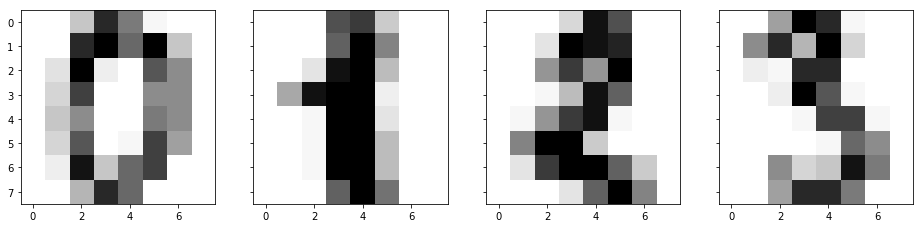

In [17]:
# Load data
data = load_digits()
X, y = data.data, data.target

# Plot digits
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6)) 
for i in range(4): 
    axes[i].imshow(X[i,:].reshape([8,8]), cmap='Greys');

In [6]:
# Split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                          random_state=17)

# Decision Tree and k-NN Implementation

In [7]:
# Train a decision tree and k-NN
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [8]:
tree_pred = tree.predict(X_test)
knn_pred = knn.predict(X_test)


print(accuracy_score(y_test, knn_pred), 
      accuracy_score(y_test, tree_pred)) 

0.9740740740740741 0.6666666666666666


## Improving the accuracy
The accuracy score of k-NN is much higher compared to decision tree. We can improve the accuracy of the decision tree model by tuning the model parameters.

In [9]:
# Perform a grid search to find the optimal parameters
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}
tree_grid = GridSearchCV(tree, tree_params, cv=5,
                         verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64], 'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [10]:
# Print the best parameters
print(tree_grid.best_params_, tree_grid.best_score_) 

{'max_features': 64, 'max_depth': 20} 0.8440731901352426


In [11]:
# Print the average cross validation score of k-NN
print(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), 
                              X_train, y_train, cv=5)))

0.9865458422397149


In [12]:
# Implement a random forest model
random_forest = RandomForestClassifier(random_state=17)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [13]:
# Print the accuracy score of the random forest model
random_forest_pred = random_forest.predict(X_test)
print(accuracy_score(y_test, random_forest_pred))

0.9407407407407408


In [14]:
# Print the cross validation score of random forest
print(np.mean(cross_val_score(RandomForestClassifier(random_state=17), 
                              X_train, y_train, cv=5)))

0.9349085619110404


# Clustering
We can also try a number of popular clustering algorithms, such as 'K-means', 'Affinity Propagation', 'Spectral Clustering' and 'Agglomerative Clustering'.

## K-Means Clustering
1. Select the number of clusters k (the number of target labels, which is 10 for the MNIST dataset).
2. Initialize k points as “centroids” randomly within the space of our data.
3. Attribute each observation to its closest centroid.
4. Update the centroids to the center of all the attributed set of observations.
5. Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4).

## Affinity Propagation
Unlike K-means, this approach does not require us to set the number of clusters to start with. Affinity propagation takes as input a collection of real-valued similarities between data points, where the similarity s(i,k) indicates how well the data point with index k is suited to be the exemplar for data point i. When the
goal is to minimize squared error, each similarity is set to a negative squared error (Euclidean distance).

## Spectral Clustering
Spectral clustering algorithm requires us to define the similarity matrix for observations called the adjacency matrix. This can be done in a similar fashion as in the Affinity Propagation algorithm, so that matrix A hosts negative square of the distances between the corresponding points. This matrix describes a full graph with the observations as vertices and the estimated similarity value between a pair of observations as edge weights for that pair of vertices. 

## Agglomerative Clustering
Agglomerative algorithm is the simplest and easiest to understand among all the the clustering algorithms without a fixed number of clusters.

1. Assign each observation to its own cluster.
2. Sort the pairwise distances between the centers of clusters in descending order.
3. Take the nearest two neigbor clusters and merge them together, and recompute the centers.
4. Repeat steps 2 and 3 until all the data is merged into one cluster.

In [18]:
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.662295,0.732799,0.735448,0.742972,0.739191,0.182097
Affinity,0.175174,0.451249,0.958907,0.486901,0.645857,0.115197
Spectral,0.752639,0.827818,0.829544,0.876367,0.852313,0.182195
Agglomerative,0.794003,0.856085,0.857513,0.879096,0.868170,0.178497
